## Problem Statement

### Its the company analysis, where company want to know the reason if employees are absent or not active in working hrs and what are the reasons

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn

In [ ]:
df = pd.read_csv('Absenteeism_data.csv')

In [ ]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [ ]:
df.tail()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2
699,15,28,31/05/2018,291,31,40,237.656,25,1,1,1,2


In [ ]:
df.shape

(700, 12)

In [ ]:
df.size

8400

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [ ]:
df.columns

Index(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index',
       'Education', 'Children', 'Pets', 'Absenteeism Time in Hours'],
      dtype='object')

In [ ]:
col_to_use = ['Age','Body Mass Index','Education','Children','Pets','Absenteeism Time in Hours']
df1 = df[col_to_use]

In [ ]:
df.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [ ]:
df.corr()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
ID,1.000000,-0.079111,-0.203788,-0.493562,0.041367,0.092873,-0.320718,-0.032889,0.026095,0.005380,-0.005469
Reason for Absence,-0.079111,1.000000,-0.131790,0.160059,-0.055210,-0.130406,0.052741,-0.060083,-0.050053,-0.032872,-0.175826
Transportation Expense,-0.203788,-0.131790,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.054597,0.381749,0.446887,0.008342
Distance to Work,-0.493562,0.160059,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.282600,0.048534,0.171585,-0.080593
Age,0.041367,-0.055210,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.209330,0.046930,-0.252067,0.035784
Daily Work Load Average,0.092873,-0.130406,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.077012,0.032194,0.010490,0.029609
Body Mass Index,-0.320718,0.052741,-0.140531,0.136190,0.483762,-0.098430,1.000000,-0.348758,-0.155711,-0.066484,-0.040203
Education,-0.032889,-0.060083,-0.054597,-0.282600,-0.209330,-0.077012,-0.348758,1.000000,-0.179521,-0.080899,-0.035621
Children,0.026095,-0.050053,0.381749,0.048534,0.046930,0.032194,-0.155711,-0.179521,1.000000,0.116586,0.093661
Pets,0.005380,-0.032872,0.446887,0.171585,-0.252067,0.010490,-0.066484,-0.080899,0.116586,1.000000,-0.024522


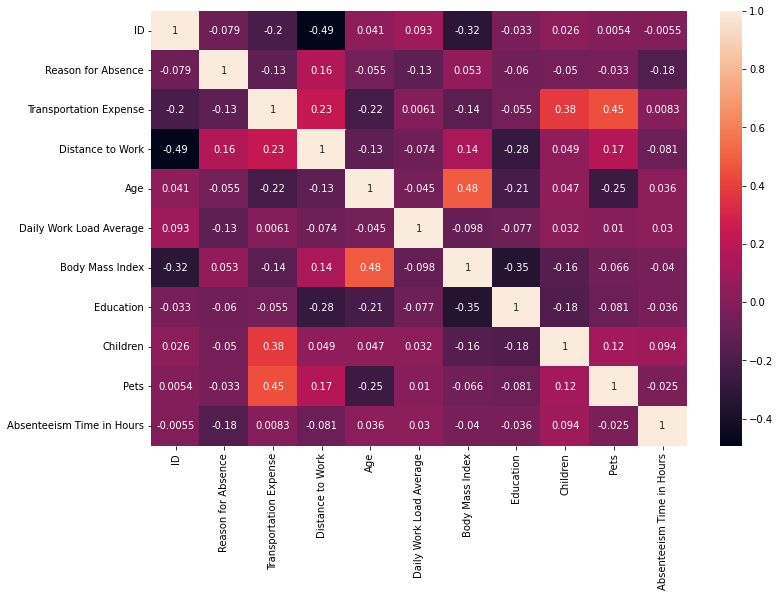

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True)

In [ ]:
df = df.drop('ID',axis = 1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [ ]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [ ]:
df_dummies = pd.get_dummies(df['Reason for Absence'])
df_dummies.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Stpe 5 : if possible or needed group the column to reduce the data size
reason_1 = df_dummies.loc[:,1:14].max(axis=1)
reason_2 = df_dummies.loc[:,15:17].max(axis=1)
reason_3 = df_dummies.loc[:,18:21].max(axis=1)
reason_4 = df_dummies.loc[:,22:].max(axis=1)

In [ ]:
#step 6: after creating groups of dummies concat it with the data
df= pd.concat([df,reason_1,reason_2,reason_3,reason_4],axis=1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [ ]:
df = df.drop(['Reason for Absence'],axis=1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [ ]:
col_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'reason_1','reason_2','reason_3','reason_4']
df.columns = col_names

In [ ]:
# Reorder the columns 
col_names_reordered = ['reason_1','reason_2','reason_3','reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df=df[col_names_reordered]
df.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [ ]:
# step 7 : handling the date codf_mod['Date']=pd.to_datetime(df_mod['Date'], format ='%d/%m/%Y')lumn as it is string object in dataset
df_mod = df.copy()

In [ ]:
type(df_mod['Date'][0])

str

In [ ]:
df_mod['Date']=pd.to_datetime(df_mod['Date'], format ='%d/%m/%Y')

In [ ]:
type(df_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   reason_1                   700 non-null    uint8         
 1   reason_2                   700 non-null    uint8         
 2   reason_3                   700 non-null    uint8         
 3   reason_4                   700 non-null    uint8         
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

In [ ]:
# Extract the month valuyes
df_mod['Date'][0].month

7

In [ ]:
list_months = []
for i in range(700):
    list_months.append(df_mod['Date'][i].month)
len(list_months)

700

In [ ]:
df_mod['month'] = list_months

In [ ]:
def day_of_week(date_value):
    return date_value.weekday()

df_mod['day of the week'] = df_mod['Date'].apply(day_of_week)

In [ ]:
col = ['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Date','month',
       'day of the week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', ]

df_mod=df_mod[col]

In [ ]:
df = df_mod.drop(["Date"],axis=1)

In [ ]:
### Conversion of Target column

In [ ]:
df.corr()

,reason_1,reason_2,reason_3,reason_4,month,day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
reason_1,1.000000,-0.053683,-0.181568,-0.702915,-0.002826,-0.078055,0.008725,-0.098625,0.022772,0.165434,-0.077597,0.081538,-0.061594,-0.054502,0.282919
reason_2,-0.053683,1.000000,-0.029241,-0.113203,-0.018406,-0.011194,-0.000487,-0.022372,0.030381,-0.016664,-0.078084,0.076667,0.081867,-0.041531,-0.012936
reason_3,-0.181568,-0.029241,1.000000,-0.382881,-0.013796,-0.103661,0.016658,-0.023367,-0.019797,0.014542,-0.038087,0.031254,0.088256,0.105854,0.204242
reason_4,-0.702915,-0.113203,-0.382881,1.000000,-0.036989,0.110696,-0.066727,0.130687,-0.062765,-0.163826,0.071160,-0.075189,-0.049680,-0.013062,-0.307408
month,-0.002826,-0.018406,-0.013796,-0.036989,1.000000,0.071718,0.135803,-0.003970,0.004983,-0.174029,0.058254,-0.069818,0.082057,0.076250,0.017625
day of the week,-0.078055,-0.011194,-0.103661,0.110696,0.071718,1.000000,0.048516,0.089484,0.004039,0.012573,-0.071750,0.058925,0.111936,-0.045163,-0.119068
Transportation Expense,0.008725,-0.000487,0.016658,-0.066727,0.135803,0.048516,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.054597,0.381749,0.446887,0.008342
Distance to Work,-0.098625,-0.022372,-0.023367,0.130687,-0.003970,0.089484,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.282600,0.048534,0.171585,-0.080593
Age,0.022772,0.030381,-0.019797,-0.062765,0.004983,0.004039,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.209330,0.046930,-0.252067,0.035784
Daily Work Load Average,0.165434,-0.016664,0.014542,-0.163826,-0.174029,0.012573,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.077012,0.032194,0.010490,0.029609


In [ ]:
df['Absenteeism Time in Hours'].value_counts()

8      195
2      149
3      106
1       87
4       57
0       39
16      18
24      15
5        7
40       7
32       6
64       3
56       2
80       2
120      2
112      2
7        1
104      1
48       1
Name: Absenteeism Time in Hours, dtype: int64

In [ ]:
df['Absenteeism Time in Hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48])

In [ ]:
df['Absenteeism Time in Hours'].median()

3.0

In [ ]:
target = np.where(df['Absenteeism Time in Hours']>df['Absenteeism Time in Hours'].median(),1,0)

#### for target column median is 3 , meaning value below 3 is accepted or normal but above 3 is not accepted as it is badly affecting the company project completion hours 

In [ ]:
target[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
df['Excessive_absenteeism']=target

In [ ]:
df = df.drop('Absenteeism Time in Hours',axis=1)

### Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


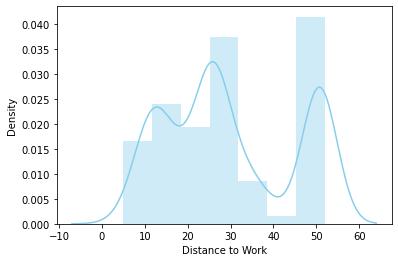

In [ ]:
sns.distplot(df['Distance to Work'], color="skyblue")

(array([525.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

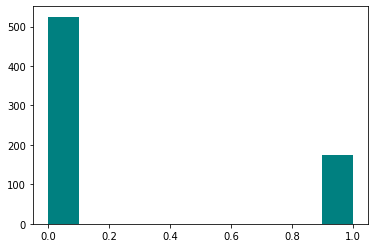

In [ ]:
plt.hist(df['reason_1'], color="teal")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


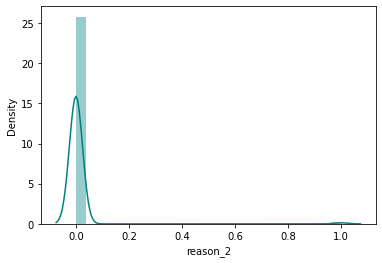

In [ ]:
sns.distplot(df['reason_2'], color="teal")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


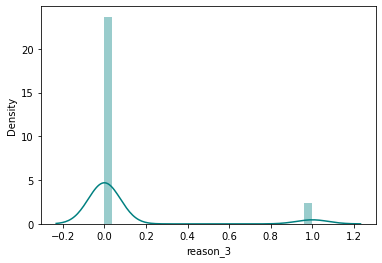

In [ ]:
sns.distplot(df['reason_3'], color="teal")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


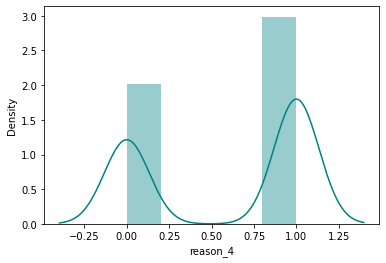

In [ ]:
sns.distplot(df['reason_4'], color="teal")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


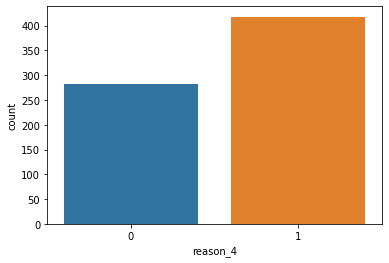

In [ ]:
sns.countplot(df['reason_4'])

In [ ]:
#sns.catplot(df['reason_4'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


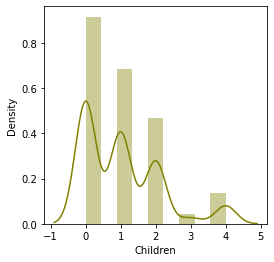

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df['Children'], color="olive")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


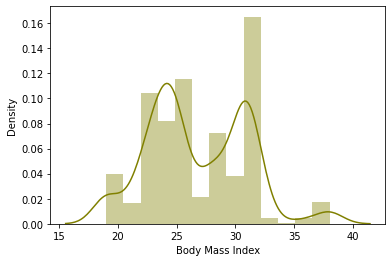

In [ ]:
sns.distplot(df['Body Mass Index'], color="olive")

In [ ]:
#plt.scatter(df['Daily Work Load Average'],df['Absenteeism Time in Hours'],marker = '*')

In [ ]:
#plt.scatter(df['Age'],df['Absenteeism Time in Hours'],marker = '*')

(array([439., 132.,  92.,   0.,   0.,  29.,   5.,   0.,   0.,   3.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

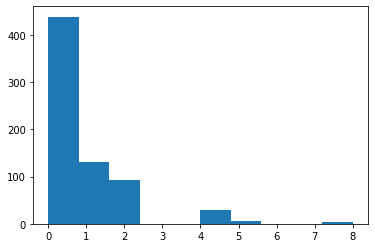

In [ ]:
plt.hist(df['Pets'],bins = 10)

In [ ]:
#!pip install dtale

### Multi-variate Analysis

In [ ]:
#import dtale

In [ ]:
#!pip install sweetviz
#import sweetviz as si

### selecting Dependent and Independent Variable

In [ ]:
x = df.drop(['Excessive_absenteeism'],axis = 1)
y = df['Excessive_absenteeism']

In [ ]:
#my_report = si.analyze(x)
#my_report.show_html()

In [ ]:
df.columns

Index(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'month',
       'day of the week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Excessive_absenteeism'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


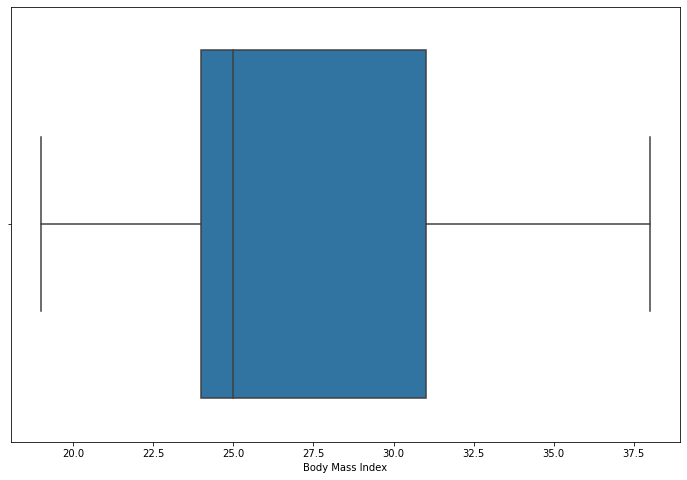

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Body Mass Index']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


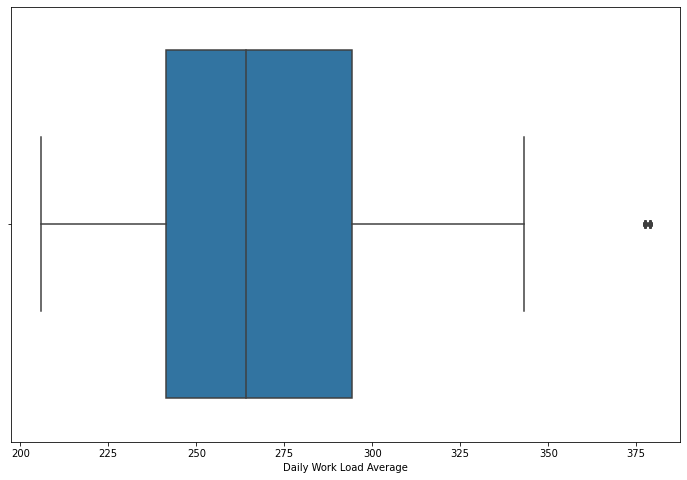

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(df['Daily Work Load Average']);

#### From the above boxplot analysis we can say that there are no outliers so we didn't handled it. Also the dataset Size is too small so every record is important for prediction

In [ ]:
df['reason_1'].value_counts()

0    525
1    175
Name: reason_1, dtype: int64

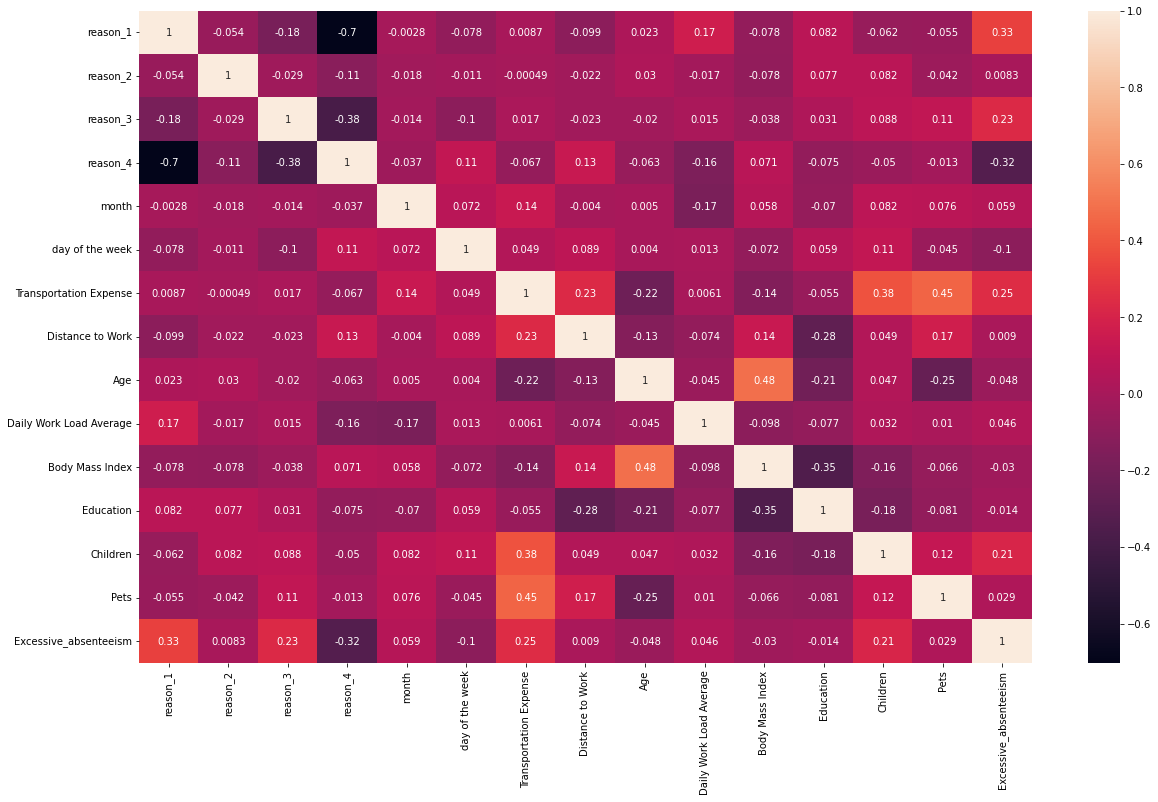

In [ ]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(),annot = True)

In [ ]:
df.head()

,reason_1,reason_2,reason_3,reason_4,month,day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive_absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,0


In [ ]:
df.columns

Index(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'month',
       'day of the week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Excessive_absenteeism'],
      dtype='object')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x, y,test_size=0.20,random_state = 42)

### Standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#vecto = TfidfVectorizer()
#vectorizer = vecto.fit_transform(x) 

### Spliting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#from sklearn.model_selection import KFold
#kfold = KFold(n_splits=5)

In [ ]:
#for train_index, test_index in kfold.split(x):
    #X_train, X_test = x[train_index], x[test_index]
    #y_train, y_test = y[train_index], y[test_index]

In [ ]:
#X_train,X_test,y_train,y_test = train_test_split(scaled, y,test_size=0.20
                                    #,random_state = 42)

In [ ]:
X_train_scaled.shape

(560, 14)

In [ ]:
N, D = X_test_scaled.shape
N,D

(140, 14)

In [ ]:
y_train.value_counts()

0    299
1    261
Name: Excessive_absenteeism, dtype: int64

In [ ]:
X_train_scaled.shape,X_test_scaled.shape

((560, 14), (140, 14))

In [ ]:
y_test.value_counts()

0    82
1    58
Name: Excessive_absenteeism, dtype: int64

In [ ]:
y_train.shape,y_test.shape

((560,), (140,))

### Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state = 42)

In [ ]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(random_state=42)

In [ ]:
lr.score(X_train_scaled,y_train)

0.775

In [ ]:
lr.score(X_test_scaled,y_test)

0.7571428571428571

In [ ]:
predict = lr.predict(X_test_scaled)

In [ ]:
# Build a confusion_metrics :-
from sklearn.metrics import confusion_matrix
# confusion_metrics :
logg_conf = confusion_matrix(predict , y_test)
logg_conf

array([[65, 17],
       [17, 41]])

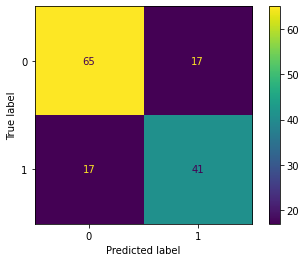

In [ ]:
# Build a confusion_metrics :-
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
# confusion_metrics :
pred = confusion_matrix(predict,y_test)
logg_conf = ConfusionMatrixDisplay(confusion_matrix=pred,
                              display_labels=lr.classes_)
logg_conf.plot()

In [ ]:
# check for the accuracy and other parameters :
from sklearn.metrics import classification_report
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        82
           1       0.71      0.71      0.71        58

    accuracy                           0.76       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.76      0.76      0.76       140



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)

In [ ]:
dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = dtc.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=dtc.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

train_accuracy :  0.9839285714285714
test_accuracy :  0.7071428571428572


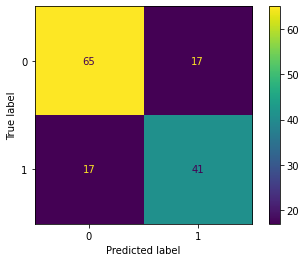

In [ ]:
# Build a confusion_metrics :-
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
# confusion_metrics :
pred = confusion_matrix(predict,y_test)
DTC = ConfusionMatrixDisplay(confusion_matrix=pred,
                              display_labels=dtc.classes_)
DTC.plot()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        82
           1       0.64      0.67      0.66        58

    accuracy                           0.71       140
   macro avg       0.70      0.70      0.70       140
weighted avg       0.71      0.71      0.71       140



In [ ]:
df.columns

Index(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'month',
       'day of the week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Excessive_absenteeism'],
      dtype='object')

In [ ]:
dtc.feature_importances_

array([0.10363704, 0.01308592, 0.09201895, 0.04210868, 0.15546328,
       0.08908196, 0.12554754, 0.05327145, 0.04210323, 0.20393457,
       0.04651621, 0.01061918, 0.01865712, 0.00395485])

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 30)

In [ ]:
rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
rfc.score(X_train_scaled,y_train)

0.9803571428571428

In [ ]:
rfc.score(X_test_scaled,y_test)

0.7285714285714285

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = rfc.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=rfc.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

train_accuracy :  0.9803571428571428
test_accuracy :  0.7285714285714285


### K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_N_N =  KNeighborsClassifier()

In [ ]:
k_N_N.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
k_N_N.score(X_test_scaled,y_test)

0.7642857142857142

In [ ]:
k_N_N.score(X_train_scaled,y_train)

0.7964285714285714

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = k_N_N.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=k_N_N.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

train_accuracy :  0.7964285714285714
test_accuracy :  0.7642857142857142


In [ ]:
import sklearn
sklearn.neighbors.VALID_METRICS['brute']

['cityblock',
 'cosine',
 'euclidean',
 'haversine',
 'l2',
 'l1',
 'manhattan',
 'precomputed',
 'nan_euclidean',
 'braycurtis',
 'canberra',
 'chebyshev',
 'correlation',
 'cosine',
 'dice',
 'hamming',
 'jaccard',
 'kulsinski',
 'mahalanobis',
 'matching',
 'minkowski',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'yule',
 'wminkowski']

### Support Vector Machine

In [ ]:
from sklearn import svm

In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train_scaled,y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

training_accuracy = model.score(X_train_scaled,y_train)
print('training accuracy : ',training_accuracy)
testing_accuracy = model.score(X_test_scaled,y_test)
print('testing accuracy : ',testing_accuracy)

training accuracy :  0.7946428571428571
testing accuracy :  0.7714285714285715


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbrt = GradientBoostingClassifier(random_state=42)

In [ ]:
gbrt.fit(X_train_scaled,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
gbrt.score(X_train_scaled,y_train)

0.8857142857142857

In [ ]:
gbrt.score(X_test_scaled,y_test)

0.7785714285714286

In [ ]:
predicted_proba = gbrt.predict_proba(X_test_scaled)
predicted_proba[:,1]

array([0.07241145, 0.12536123, 0.30719191, 0.47733251, 0.40363522,
       0.65869018, 0.26805268, 0.7992622 , 0.07172166, 0.20378036,
       0.07212089, 0.29241538, 0.8482026 , 0.43372493, 0.06714394,
       0.60028936, 0.08312608, 0.38740553, 0.04910659, 0.3764423 ,
       0.79566777, 0.14892961, 0.11104936, 0.31343142, 0.07529435,
       0.82375927, 0.50218205, 0.5967769 , 0.21679901, 0.56823176,
       0.05655752, 0.16305758, 0.6612358 , 0.71279487, 0.20091201,
       0.64197162, 0.11104936, 0.36447414, 0.84267749, 0.03272981,
       0.75817599, 0.16199418, 0.78715378, 0.07153144, 0.13745175,
       0.38866144, 0.7831214 , 0.89639779, 0.12718764, 0.08149528,
       0.17427322, 0.11437184, 0.35454852, 0.94354974, 0.19179671,
       0.10503908, 0.9135068 , 0.23120888, 0.57730217, 0.28877052,
       0.96652047, 0.08206416, 0.83373867, 0.77461612, 0.07212089,
       0.55660718, 0.25166361, 0.04385974, 0.06116002, 0.48803155,
       0.20378036, 0.33879001, 0.93802261, 0.11437184, 0.14359

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(scaled)
X_pca.shape

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y, test_size = 0.20, random_state = 42)

In [ ]:
pca.n_components_

In [ ]:
gbrt.fit(X_train_pca,y_train)

In [ ]:
gbrt.score(X_train_pca,y_train)

In [ ]:
gbrt.score(X_test_pca,y_test)

### Cross validation on Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
          'penalty' : ('l1', 'l2', 'elasticnet', 'none'),
          'C' : [1,2,3,4,5],
        'n_jobs' : [-1,-2,-3,-4,-5]}
grid_search_cv = GridSearchCV(LogisticRegression(random_state=42),
                             param,cv=10)
grid_search_cv.fit(X_train_scaled,y_train)

Streaming output truncated to the last 5000 lines.

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1523: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters

/usr/local/lib/python3.8/dist-p

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 2, 3, 4, 5], 'n_jobs': [-1, -2, -3, -4, -5],
                         'penalty': ('l1', 'l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')})

In [ ]:
grid_search_cv.best_estimator_

LogisticRegression(C=1, n_jobs=-1, penalty='none', random_state=42,
                   solver='newton-cg')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cv.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred_grid=grid_search_cv.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

train_accuracy :  0.775
test_accuracy :  0.7642857142857142


In [ ]:
# check for the accuracy and other parameters :
from sklearn.metrics import classification_report
print(classification_report(y_pred_grid,y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        81
           1       0.72      0.71      0.72        59

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140



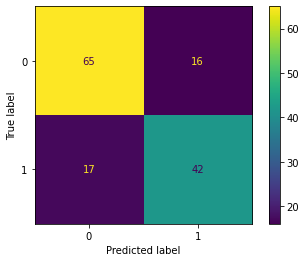

In [ ]:
# Build a confusion_metrics :-
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
# confusion_metrics :
pred = confusion_matrix(y_pred_grid,y_test)
logistic = ConfusionMatrixDisplay(confusion_matrix=pred,
                              display_labels=grid_search_cv.classes_)
logistic.plot()

### Cross validation on Desision Tree

In [ ]:
param = {'criterion' : ('entropy','gini'),
        'max_depth' : [3,5,7],
        'max_leaf_nodes':list(range(2,40)),
        'min_samples_split':[2,3,4,5,6,8,9],
        'min_samples_leaf':list(range(5,15))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             param,cv=10)
grid_search_cv.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14],
                         'min_samples_split': [2, 3, 4, 5, 6, 8, 9]})

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=8,
                       min_samples_leaf=13, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cv.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_pred=grid_search_cv.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,y_pred)
print('test_accuracy : ',test_accuracy)

train_accuracy :  0.775
test_accuracy :  0.7642857142857142


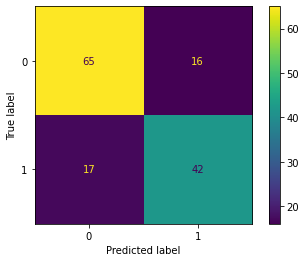

In [ ]:
# Build a confusion_metrics :-
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
# confusion_metrics :
pred_y = confusion_matrix(y_pred,y_test)
DTC = ConfusionMatrixDisplay(confusion_matrix=pred_y,
                              display_labels=grid_search_cv.classes_)
DTC.plot()

In [ ]:
# check for the accuracy and other parameters :
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        81
           1       0.72      0.71      0.72        59

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140



### Cross validation on Random Forest 

In [ ]:
param = {'criterion': ('entropy','gini'),
         'max_depth' : [3,5,7],
          'min_samples_split' : [1,2,3,4,5],
          'n_estimators' : list(range(5,50))}
grid_search_cvd = GridSearchCV(RandomForestClassifier(random_state=42),
                             param,cv=10)
grid_search_cvd.fit(X_train_scaled,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


2700 fits failed out of a total of 13500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2700 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/paralle

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21, 22, 23, 24,
                                          25, 26, 27, 28, 29, 30, 31, 32, 33,
                                          34, ...]})

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=8,
                       min_samples_leaf=13, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cvd.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
predic=grid_search_cvd.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,predic)
print('test_accuracy : ',test_accuracy)

train_accuracy :  0.85
test_accuracy :  0.7571428571428571


In [ ]:
# check for the accuracy and other parameters :
from sklearn.metrics import classification_report
print(classification_report(predic,y_test))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        78
           1       0.74      0.69      0.72        62

    accuracy                           0.76       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.76      0.76      0.76       140



### Cross validation on K-Nearest Neighbours

In [ ]:
param = {'metric' : ('cityblock','wminkowski','euclidean','l1','l2','manhattan','chebyshev',
                     'minkowski','seuclidean'),
         'n_neighbors': [3,4,5,6,7]}
grid_search_cvn = GridSearchCV(KNeighborsClassifier(),
                             param,cv=10)
grid_search_cvn.fit(X_train_scaled,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


100 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 549, in _fit
    self._tree = BallTree(
  File "sklearn/neighbors/_binary_tree.pxi", line 966, in sklear

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('cityblock', 'wminkowski', 'euclidean',
                                    'l1', 'l2', 'manhattan', 'chebyshev',
                                    'minkowski', 'seuclidean'),
                         'n_neighbors': [3, 4, 5, 6, 7]})

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=8,
                       min_samples_leaf=13, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cvn.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_prd=grid_search_cvn.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,y_prd)
print('test_accuracy : ',test_accuracy)

train_accuracy :  0.8089285714285714
test_accuracy :  0.7285714285714285


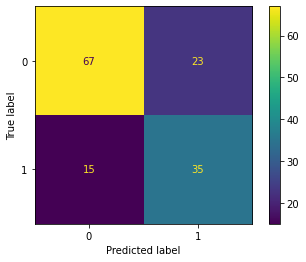

In [ ]:
# Build a confusion_metrics :-
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
# confusion_metrics :
prd_y = confusion_matrix(y_prd,y_test)
knC = ConfusionMatrixDisplay(confusion_matrix=prd_y,
                              display_labels=grid_search_cvn.classes_)
knC.plot()

In [ ]:
# check for the accuracy and other parameters :
from sklearn.metrics import classification_report
print(classification_report(y_prd,y_test))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        90
           1       0.60      0.70      0.65        50

    accuracy                           0.73       140
   macro avg       0.71      0.72      0.71       140
weighted avg       0.74      0.73      0.73       140



Cross Validation on Gradient Boosting 

In [ ]:
param = {'max_depth' : [1,2,3,4,5],
        'n_estimators' : [50,75,100,125,150,175,200],
         'loss' : ('deviance', 'exponential'),
        'learning_rate' : [0.01,0.1,0.2,0.5,1]}
grid_search_cvg = GridSearchCV(GradientBoostingClassifier(random_state=42),
                             param,cv=10)
grid_search_cvg.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1],
                         'loss': ('deviance', 'exponential'),
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 75, 100, 125, 150, 175, 200]})

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=8,
                       min_samples_leaf=13, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = grid_search_cvg.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('train_accuracy : ',train_accuracy)
y_ped=grid_search_cvg.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test,y_ped)
print('test_accuracy : ',test_accuracy)

train_accuracy :  0.7589285714285714
test_accuracy :  0.7428571428571429


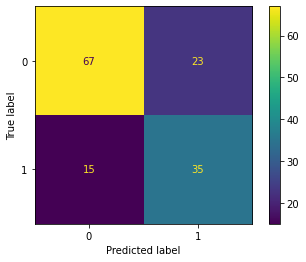

In [ ]:
# Build a confusion_metrics :-
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
# confusion_metrics :
ped_y = confusion_matrix(y_ped,y_test)
DTC = ConfusionMatrixDisplay(confusion_matrix=prd_y,
                              display_labels=grid_search_cvg.classes_)
DTC.plot()

In [ ]:
# check for the accuracy and other parameters :
from sklearn.metrics import classification_report
print(classification_report(y_ped,y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        78
           1       0.72      0.68      0.70        62

    accuracy                           0.74       140
   macro avg       0.74      0.74      0.74       140
weighted avg       0.74      0.74      0.74       140



In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({'Algorithm':('Logistic_Regression','Decision_Tree_Classifier','Random_Forest_Classifier','Support_Vector_Machine','K_Nearest_Neighbour','Gradient_Boosting',
                                'Cross_Validation_on_Logistic_Regression','Cross_Validation_on_Decision_Tree','Cross_Validation_on_Random_Forest',
                                'Cross_Validation_on_KNeighborsClassifier','Cross_Validation_on_Support_vector_Classifier','Cross_Validation_on_GradientBoostingClassifier'),
                  'Training_Accuracy':(0.77036,0.98607,0.98357,0.79500,0.7971,0.83781,0.78392,0.85678,0.91257,0.82857,0.79107,0.75750),
                   'Testing_Accuracy':(0.75142,0.70714,0.76857,0.77140,0.76571,0.75714,0.76428,0.76428,0.75142,0.72571,0.77142,0.74000)
                  })
df

,Algorithm,Training_Accuracy,Testing_Accuracy
0,Logistic_Regression,0.77036,0.75142
1,Decision_Tree_Classifier,0.98607,0.70714
2,Random_Forest_Classifier,0.98357,0.76857
3,Support_Vector_Machine,0.79500,0.77140
4,K_Nearest_Neighbour,0.79710,0.76571
5,Gradient_Boosting,0.83781,0.75714
6,Cross_Validation_on_Logistic_Regression,0.78392,0.76428
7,Cross_Validation_on_Decision_Tree,0.85678,0.76428
8,Cross_Validation_on_Random_Forest,0.91257,0.75142
9,Cross_Validation_on_KNeighborsClassifier,0.82857,0.72571


In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential(
    [keras.layers.Dense(1,input_shape = (14,),activation = 'sigmoid')
     ])

model.compile(optimizer =keras.optimizers.SGD(0.001,0.9),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data= (X_test_scaled,y_test), epochs = 700)

Epoch 1/700
18/18 [==============================] - 1s 9ms/step - loss: 0.8069 - accuracy: 0.5214 - val_loss: 0.7630 - val_accuracy: 0.5500
Epoch 2/700
18/18 [==============================] - 0s 2ms/step - loss: 0.7905 - accuracy: 0.5375 - val_loss: 0.7430 - val_accuracy: 0.5571
Epoch 3/700
18/18 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.5411 - val_loss: 0.7239 - val_accuracy: 0.5786
Epoch 4/700
18/18 [==============================] - 0s 3ms/step - loss: 0.7549 - accuracy: 0.5500 - val_loss: 0.7072 - val_accuracy: 0.5929
Epoch 5/700
18/18 [==============================] - 0s 3ms/step - loss: 0.7399 - accuracy: 0.5607 - val_loss: 0.6915 - val_accuracy: 0.6071
Epoch 6/700
18/18 [==============================] - 0s 2ms/step - loss: 0.7260 - accuracy: 0.5696 - val_loss: 0.6785 - val_accuracy: 0.6071
Epoch 7/700
18/18 [==============================] - 0s 2ms/step - loss: 0.7141 - accuracy: 0.5643 - val_loss: 0.6655 - val_accuracy: 0.5929
Epoch 8/700
1

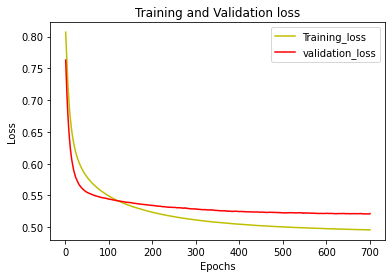

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label = 'Training_loss')
plt.plot(epochs,val_loss,'r',label = 'validation_loss')
plt.legend()
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

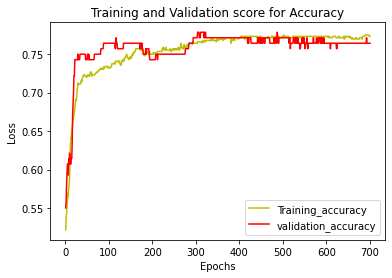

In [ ]:
loss_mae = history.history['accuracy']
val_loss_mae = history.history['val_accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss_mae,'y',label = 'Training_accuracy')
plt.plot(epochs,val_loss_mae,'r',label = 'validation_accuracy')
plt.legend()
plt.title('Training and Validation score for Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
prediction = model.predict(X_train_scaled[:5])
print(f'predicted values are : {prediction}')
print(f'real values are : {y_train[:5]}')

1/1 [==============================] - 0s 51ms/step
predicted values are : [[0.68035895]
 [0.06434959]
 [0.8218288 ]
 [0.09412252]
 [0.16631852]]
real values are : 82     1
51     0
220    1
669    0
545    1
Name: Excessive_absenteeism, dtype: int64


In [ ]:
df[48:55]

,reason_1,reason_2,reason_3,reason_4,month,day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive_absenteeism
48,0,0,0,1,9,4,260,50,36,241.476,23,1,4,0,1
49,1,0,0,0,9,0,291,31,40,241.476,25,1,1,1,1
50,0,0,0,0,9,0,260,50,36,241.476,23,1,4,0,0
51,0,0,0,0,9,0,225,26,28,241.476,24,1,1,2,0
52,0,0,0,1,9,1,225,26,28,241.476,24,1,1,2,0
53,0,0,0,1,9,1,118,10,37,241.476,28,1,0,0,0
54,0,0,0,0,9,1,289,36,33,241.476,30,1,2,1,0


In [ ]:
Training_Accuracy_neural = model.evaluate(X_train_scaled,y_train)
print(f'Accuracy from neural_network is : {Training_Accuracy_neural}')

18/18 [==============================] - 0s 5ms/step - loss: 0.4956 - accuracy: 0.7714
Accuracy from neural_network is : [0.4956260025501251, 0.7714285850524902]


In [ ]:
Testing_Accuracy_neural = model.evaluate(X_test_scaled,y_test)
print(f'Accuracy from neural_network is : {Testing_Accuracy_neural}')

5/5 [==============================] - 0s 5ms/step - loss: 0.5213 - accuracy: 0.7643
Accuracy from neural_network is : [0.5213402509689331, 0.7642857432365417]


### From above neural network analysis we got the same acccuracies as we got in the normal machine learning algorithms.
